<a href="https://colab.research.google.com/github/jenin144/ML_HW1/blob/main/ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="font-family: 'Times New Roman', Times, serif;">Assignment #1— Electric Vehicle Population Dataset</span>


Jenin Mansour 1200540


Hala Gholeh  1201418

##1.Data Cleaning and Feature Engineering

In [ ]:
#import neaded libraries
import pandas as pd
import seaborn as sns
import numpy as np




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Read the data from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')

In [ ]:
#show first 5 examples of Data set
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EB5J,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,474363746,POINT (-122.6231895 47.5930874),PUGET SOUND ENERGY INC,5.303508e+10
4,1N4AZ1CP3K,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150.0,0.0,45.0,476346482,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
#Print the shape of the DataFrame (#rows and #columns)
print(df.shape)

(210165, 17)


In [ ]:
#Show information about data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210165 entries, 0 to 210164
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         210165 non-null  object 
 1   County                                             210161 non-null  object 
 2   City                                               210161 non-null  object 
 3   State                                              210165 non-null  object 
 4   Postal Code                                        210161 non-null  float64
 5   Model Year                                         210165 non-null  int64  
 6   Make                                               210165 non-null  object 
 7   Model                                              210165 non-null  object 
 8   Electric Vehicle Type                              210165 non-null  object

In [ ]:
# Summary statistics
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,210161.000000,210165.000000,210160.000000,210160.000000,209720.000000,2.101650e+05,2.101610e+05
mean,98178.209406,2021.048657,50.602241,897.676889,28.929954,2.290774e+08,5.297929e+10
std,2445.429402,2.988941,86.973210,7653.588604,14.908392,7.115519e+07,1.551466e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.469000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.948816e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.405164e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.629758e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


###1.Document Missing Values: Check for missing values and document their frequency and distribution across features.

In [ ]:
# Check for missing values and sum them
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


###2.Missing Value Strategies: If missing values are present, apply multiple strategies (e.g.,mean/median imputation, dropping rows) and compare their impact on the analysis.

In [ ]:
#Median


df_median = df.copy()


numeric_columns = df_median.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    df_median[column].fillna(df_median[column].median(), inplace=True)


categorical_columns = df_median.select_dtypes(include=['object', 'category', 'bool']).columns
for column in categorical_columns:
    df_median[column].fillna(df_median[column].mode()[0], inplace=True)

df_median.isnull().sum()




<ipython-input-10-83a664cfb956>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median[column].fillna(df_median[column].median(), inplace=True)
<ipython-input-10-83a664cfb956>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
#Create a copy of df median
df_visulization = df_median.copy()


In [ ]:
#Dropping

df_dropping = df.dropna(axis=0)
df_dropping.isnull().sum()


,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


###Feature Encoding: Encode categorical features (e.g., Make, Model) using techniques like one-hot encoding.

In [ ]:
#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Identify non-numeric (categorical) columns
non_numeric_columns = df_median.select_dtypes(exclude=['number']).columns

# Create an instance of the OneHotEncoder with 'handle_unknown' set to 'ignore'
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Keep sparse_output as True for efficiency

# Fit and transform the non-numeric columns into a one-hot encoded sparse matrix
df_categorical = enc.fit_transform(df_median[non_numeric_columns])

# Convert the sparse matrix into a DataFrame
# This way, we avoid converting it to a dense array to prevent memory issues
encoded_columns = enc.get_feature_names_out(input_features=non_numeric_columns)
df_encoded = pd.DataFrame.sparse.from_spmatrix(df_categorical, columns=encoded_columns)

# Combine the one-hot encoded columns with the original DataFrame
df_median = pd.concat([df_median.drop(columns=non_numeric_columns), df_encoded], axis=1)

# Display the updated DataFrame
df_median.head()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,VIN (1-10)_1C4JJXN60P,VIN (1-10)_1C4JJXN61P,VIN (1-10)_1C4JJXN62P,...,Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
0,98380.0,2021,30.0,0.0,35.0,267929112,5.303509e+10,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0
1,98370.0,2018,215.0,0.0,23.0,475911439,5.303509e+10,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0
2,98012.0,2016,15.0,0.0,1.0,101971278,5.306105e+10,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0
3,98310.0,2018,215.0,0.0,23.0,474363746,5.303508e+10,0,0,0,...,0,0,0,0,0,0,0,1.0,0,0
4,98052.0,2019,150.0,0.0,45.0,476346482,5.303303e+10,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0


In [ ]:
df_median.shape

(210165, 14598)

###Normalization: Normalize numerical features if necessary for chosen analysis methods.

In [ ]:
#Normalization.
#Min-Max Technique
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler
scaler = MinMaxScaler()

# Normalize the specified columns
df_median[['Electric Range', 'Base MSRP', 'Postal Code', 'DOL Vehicle ID', 'Model Year' , 'Legislative District' , '2020 Census Tract']] = scaler.fit_transform(df_median[['Electric Range', 'Base MSRP', 'Postal Code', 'DOL Vehicle ID', 'Model Year', 'Legislative District' ,'2020 Census Tract']])



In [ ]:
print(df_median.head())

   Postal Code  Model Year  Electric Range  Base MSRP  Legislative District  \
0     0.987766    0.846154        0.089021        0.0              0.708333   
1     0.987664    0.730769        0.637982        0.0              0.458333   
2     0.984005    0.653846        0.044510        0.0              0.000000   
3     0.987051    0.730769        0.637982        0.0              0.458333   
4     0.984414    0.769231        0.445104        0.0              0.916667   

   DOL Vehicle ID  2020 Census Tract  VIN (1-10)_1C4JJXN60P  \
0        0.559050           0.945730                      0   
1        0.993024           0.945730                      0   
2        0.212763           0.946202                      0   
3        0.989794           0.945730                      0   
4        0.993932           0.945693                      0   

   VIN (1-10)_1C4JJXN61P  VIN (1-10)_1C4JJXN62P  ...  \
0                      0                      0  ...   
1                      0          

In [ ]:
#To verfiy Min max Normaliztion
numerical_columns = ['Electric Range', 'Base MSRP', 'Postal Code', 'DOL Vehicle ID', 'Model Year','Legislative District','2020 Census Tract']

# Check minimum and maximum values of the normalized columns
min_values = df_median[numerical_columns].min()
max_values = df_median[numerical_columns].max()

# Display the min and max values
print("Minimum values after normalization:")
print(min_values)

print("\nMaximum values after normalization:")
print(max_values)


Minimum values after normalization:
Electric Range          0.0
Base MSRP               0.0
Postal Code             0.0
DOL Vehicle ID          0.0
Model Year              0.0
Legislative District    0.0
2020 Census Tract       0.0
dtype: float64

Maximum values after normalization:
Electric Range          1.0
Base MSRP               1.0
Postal Code             1.0
DOL Vehicle ID          1.0
Model Year              1.0
Legislative District    1.0
2020 Census Tract       1.0
dtype: float64


In [ ]:
#5. Descriptive Statistics: Calculate summary statistics (mean, median, standard deviation) for numerical features.

import pandas as pd

# Assuming df_median is already defined
# Replace these column names with the actual numeric columns you want to analyze
selected_columns = [
    'Postal Code',
    'Model Year',
    'Electric Range',
    'Base MSRP' ,
    'Legislative District',
    'DOL Vehicle ID',
    '2020 Census Tract'
]

# Step 1: Select only the specified numeric columns
numeric_df = df_median[selected_columns]

# Step 2: Calculate summary statistics
summary_statistics = numeric_df.describe()

# Display the summary statistics
print("Summary Statistics:")
print(summary_statistics)



Summary Statistics:
         Postal Code     Model Year  Electric Range      Base MSRP  \
count  210165.000000  210165.000000   210165.000000  210165.000000   
mean        0.985704       0.848025        0.150151       0.001062   
std         0.024992       0.114959        0.258079       0.009057   
min         0.000000       0.000000        0.000000       0.000000   
25%         0.984414       0.769231        0.000000       0.000000   
50%         0.985160       0.884615        0.000000       0.000000   
75%         0.987705       0.923077        0.124629       0.000000   
max         1.000000       1.000000        1.000000       1.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         210165.000000   210165.000000      210165.000000  
mean               0.582009        0.477982           0.944716  
std                0.310276        0.148472           0.028198  
min                0.000000        0.000000           0.000000  
25%                0.333

In [ ]:
#6. Spatial Distribution: Visualize the spatial distribution of EVs across locations (e.g., maps).

import pandas as pd
import re
import folium
from IPython.display import display

coordinates = []
for col in df_median.columns:
    # Use regex to find POINT (longitude latitude)
    match = re.search(r'POINT \(([-\d.]+) ([-\d.]+)\)', col)
    if match:
        longitude = float(match.group(1))
        latitude = float(match.group(2))
        coordinates.append((latitude, longitude))

# Unzip the list of coordinates into separate latitude and longitude lists
if coordinates:
    latitudes, longitudes = zip(*coordinates)
    initial_center = coordinates[0]

    # Create the map
    m = folium.Map(location=initial_center, zoom_start=2.5)

    # Add points to the map
    for lat, lon in coordinates:
        folium.Marker(
            location=(lat, lon),
            popup=f"Location: ({lat}, {lon})",
            icon=folium.Icon(color='red')
        ).add_to(m)

    display(m)
else:
    print("No valid coordinates found.")



#We can validate this by noting that entry 209578 in Tucson City, with longitude -110.9156341 and latitude 32.3050619, can be easily found on the map of Tucson City at the same location. Additionally, this location is represented by a point in the scatter plot.

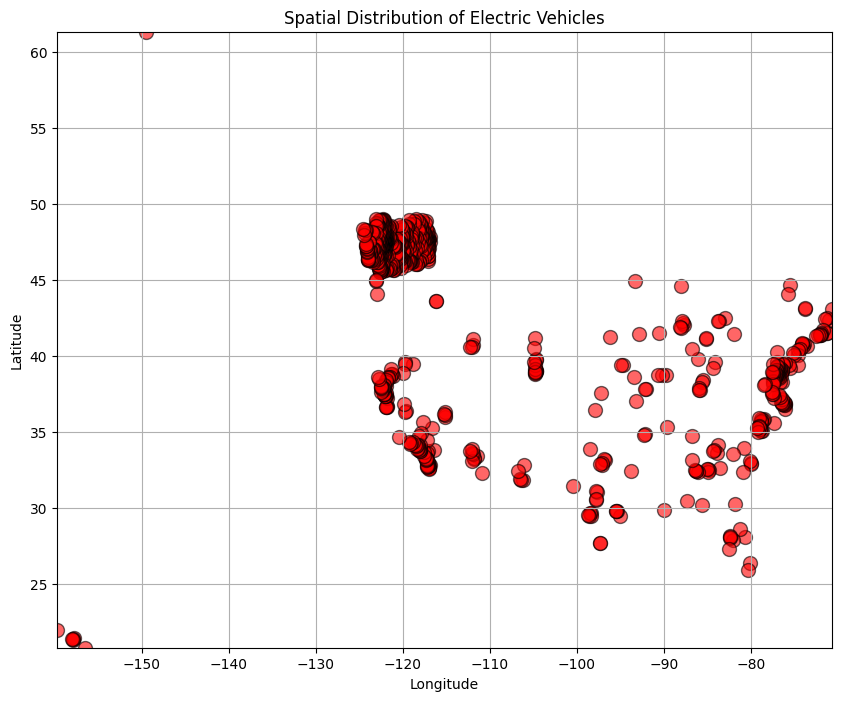

In [ ]:
#6. Spatial Distribution: Visualize the spatial distribution of EVs across locations (e.g., maps).

import pandas as pd
import re
import folium
from IPython.display import display
import matplotlib.pyplot as plt


coordinates = []
for col in df_median.columns:
    # Use regex to find POINT (longitude latitude)
    match = re.search(r'POINT \(([-\d.]+) ([-\d.]+)\)', col)
    if match:
        longitude = float(match.group(1))
        latitude = float(match.group(2))
        coordinates.append((latitude, longitude))

# Unzip the list of coordinates into separate latitude and longitude lists
if coordinates:
    latitudes, longitudes = zip(*coordinates)

#Using Sctter plot
    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(longitudes, latitudes, alpha=0.6, c='red', edgecolors='k', s=100)

    # Add titles and labels
    plt.title('Spatial Distribution of Electric Vehicles')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.xlim(min(longitudes) - 0.01, max(longitudes) + 0.01)
    plt.ylim(min(latitudes) - 0.01, max(latitudes) + 0.01)

    # Show the plot
    plt.show()



Top 10 Most Popular EV Models:
Model
MODEL Y           44038
MODEL 3           32520
LEAF              13606
MODEL S            7795
BOLT EV            6780
MODEL X            6239
VOLT               4815
ID.4               4716
MUSTANG MACH-E     4363
WRANGLER           4116
Name: count, dtype: int64


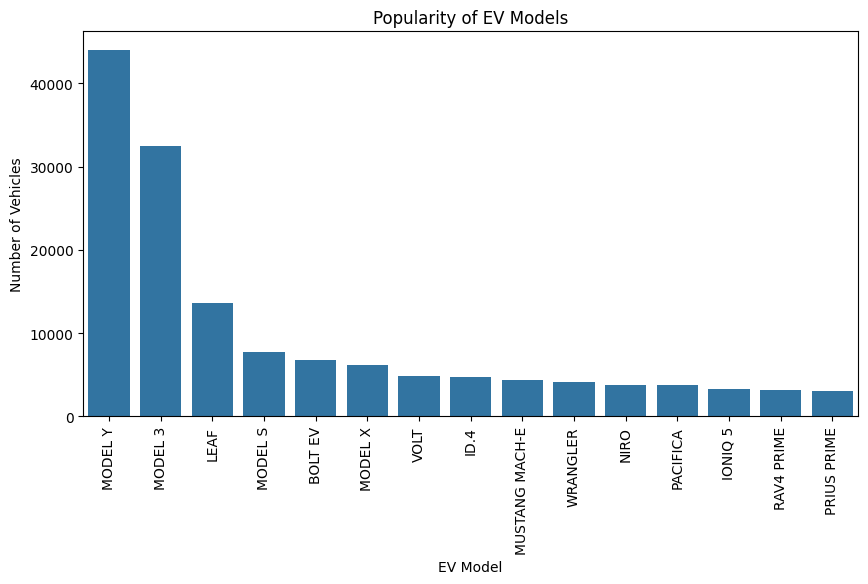

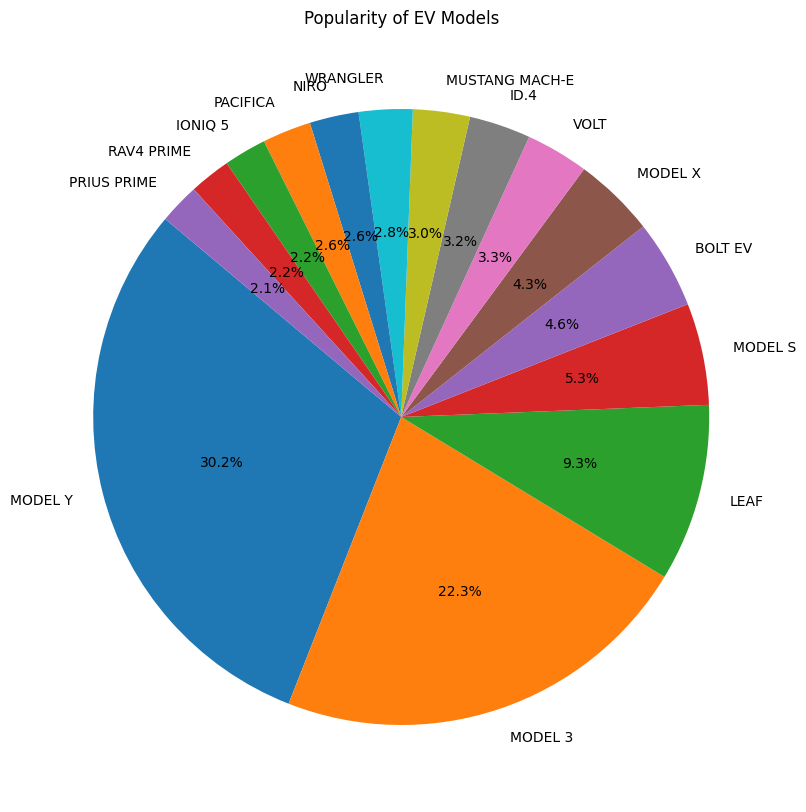

<ipython-input-25-d588c1293c8f>:72: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping


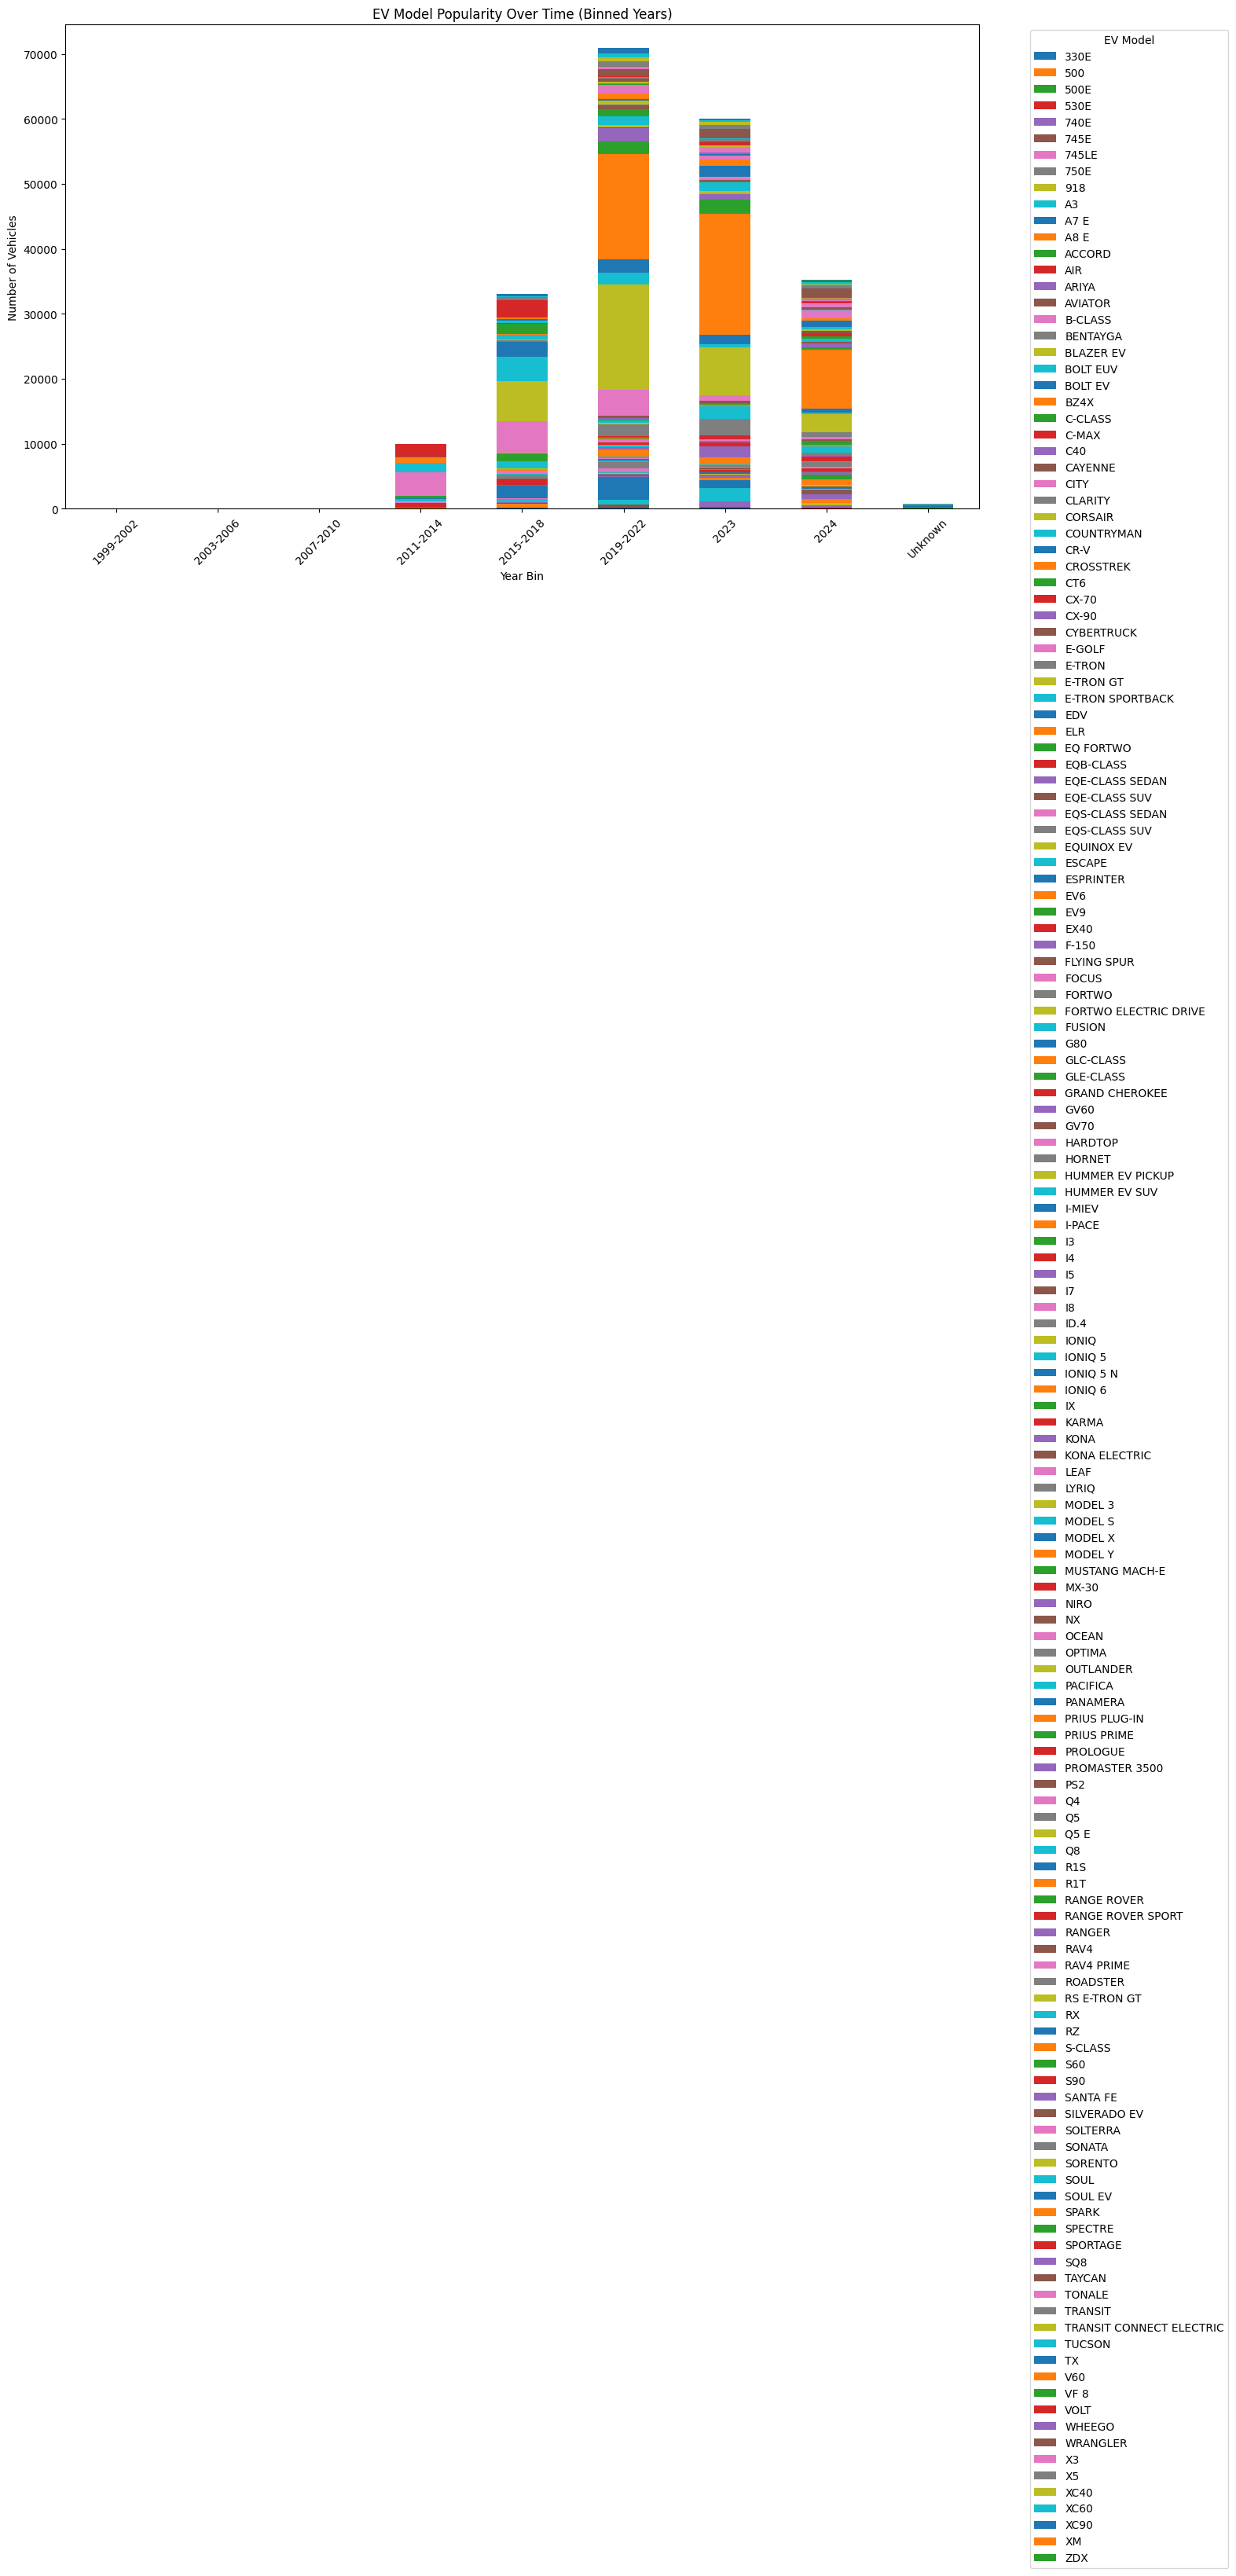

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Reverse one-hot encoding to get the 'Model' column
model_columns = df_median.columns[df_median.columns.str.startswith('Model_')]
# Convert the sparse columns to dense before applying idxmax
df_median['Model'] = df_median[model_columns].sparse.to_dense().idxmax(axis=1).str.replace('Model_', '')

#Count the occurrences of each EV model
model_counts = df_median['Model'].value_counts()


#Bar chart
# Display the top 10 most popular models
print("Top 10 Most Popular EV Models:")
print(model_counts.head(10))

# Visualize the distribution of EV models using a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Model', data=df_median, order=model_counts.index[:15])  # Display top 15 models
plt.xticks(rotation=90)
plt.title('Popularity of EV Models')
plt.xlabel('EV Model')
plt.ylabel('Number of Vehicles')
plt.show()

#Visualize the distribution of EV models using a Pie chart
plt.figure(figsize=(10, 10))
plt.pie(model_counts[:15], labels=model_counts[:15].index, autopct='%1.1f%%', startangle=140)
plt.title('Popularity of EV Models')
plt
plt.show()



# Histograms
# Create a new column for binned years
def bin_years(year):
    if year < 2003:
        return '1999-2002'
    elif year < 2007:
        return '2003-2006'
    elif year < 2011:
        return '2007-2010'
    elif year < 2015:
        return '2011-2014'
    elif year < 2019:
        return '2015-2018'
    elif year < 2023:
        return '2019-2022'
    elif year == 2023:
        return '2023'
    elif year == 2024:
        return '2024'
    else:
        return 'Unknown'

df_median['Year Bin'] = df['Model Year'].apply(bin_years)

# Count the occurrences of each EV model in each year bin
year_model_counts = df_median.groupby(['Year Bin', 'Model']).size().unstack(fill_value=0)

# Plot the histogram of EV Model Popularity Over Time
year_model_counts.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title('EV Model Popularity Over Time (Binned Years)')
plt.xlabel('Year Bin')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend(title='EV Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

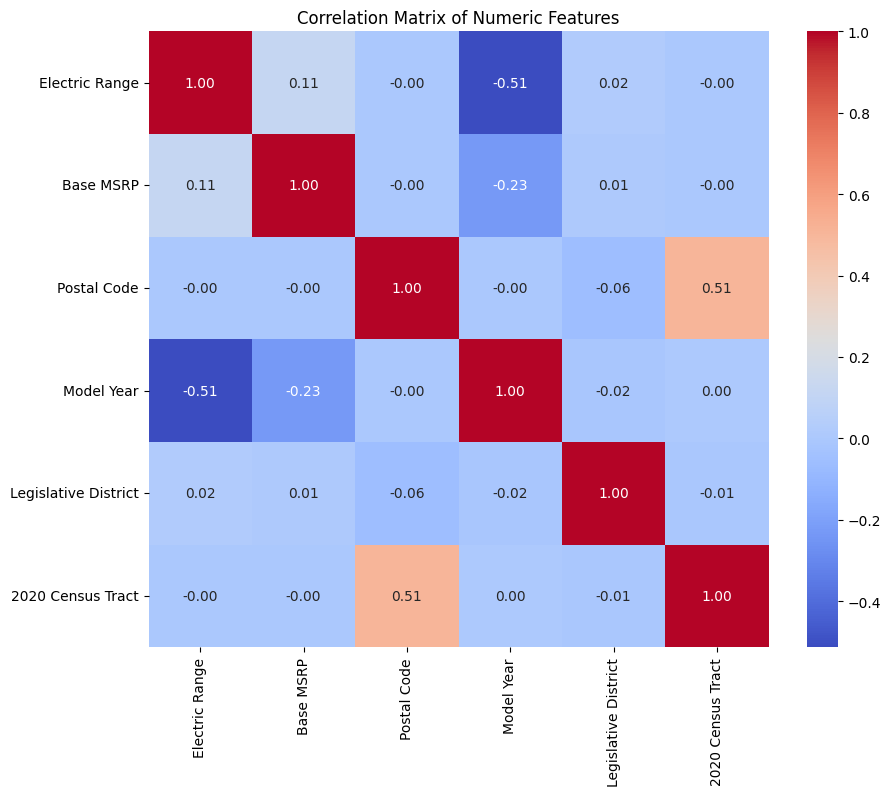

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Electric Range', 'Base MSRP', 'Postal Code', 'Model Year','Legislative District','2020 Census Tract']


correlation_matrix = df_median[numeric_columns].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()






##Visualization:

###9.Data Exploration Visualizations: Create various visualizations (e.g., histograms, scatter plots, boxplots) to explore the relationships between features

<ipython-input-15-027c853cfd2b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_visulization, x='Model Year', palette='viridis')


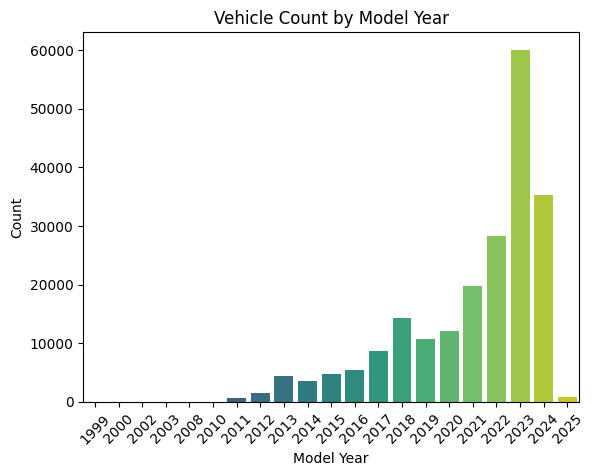

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of vehicle count by model year
sns.countplot(data=df_visulization, x='Model Year', palette='viridis')
plt.title('Vehicle Count by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


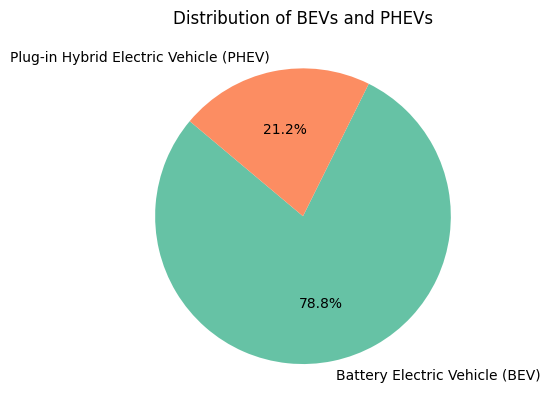

In [ ]:
# Pie chart for electric type distribution
df_visulization['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)
plt.title('Distribution of BEVs and PHEVs')
plt.ylabel('')
plt.show()

###10.Comparative Visualization: Compare the distribution of EVs across different locations (cities, counties) using bar charts or stacked bar charts.

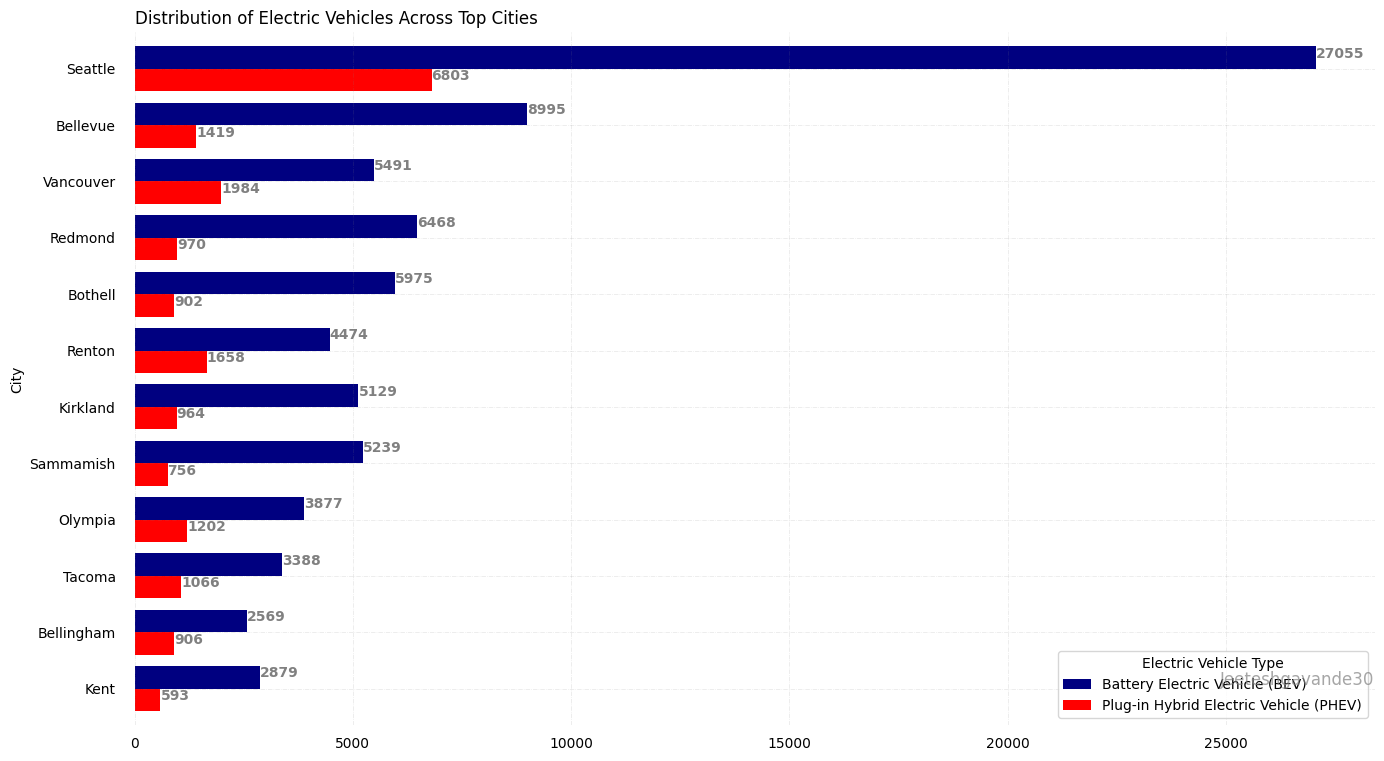

In [ ]:
# Group by City and Electric Vehicle Type, and count occurrences
ev_counts = df_visulization.groupby('City')['Electric Vehicle Type'].value_counts().unstack(fill_value=0)

# Select the top N cities to visualize (for example, top 12)
top_cities = ev_counts.sum(axis=1).nlargest(12).index
ev_counts_top = ev_counts.loc[top_cities]

# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))

# Create a side-by-side bar plot
bars = ev_counts_top.plot(kind='barh', ax=ax, color=['navy', 'red'], width=0.8)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Distribution of Electric Vehicles Across Top Cities', loc='left')

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize=12,
         color='grey', ha='right', va='bottom',
         alpha=0.7)

# Adding numbers on the bars
for bar in bars.patches:
    # Get the height of the bar (value)
    height = bar.get_width()  # Use get_height() for vertical bars
    # Add text on the bars
    ax.text(height + 0.2, bar.get_y() + bar.get_height() / 2,
            str(int(height)),  # Convert the height to integer for better formatting
            fontsize=10,
            fontweight='bold',
            color='grey')

# Show Plot
plt.show()

<ipython-input-37-8f41479ffd56>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='plasma')


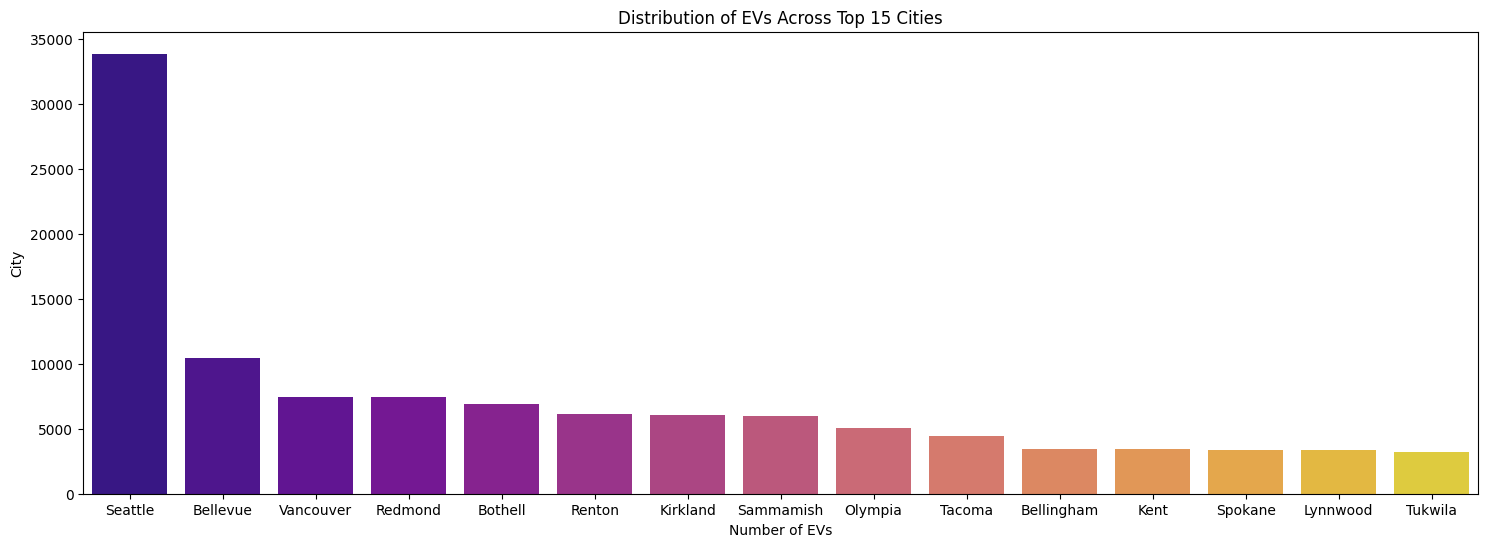

In [ ]:
# Group by City and count the number of EVs per city
city_distribution = df_visulization['City'].value_counts().head(15)

plt.figure(figsize=(18, 6))
sns.barplot(x=city_distribution.index, y=city_distribution.values, palette='plasma')
plt.title('Distribution of EVs Across Top 15 Cities')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.show()

###11.Temporal Analysis (Optional): If the dataset includes data across multiple time points,
analyze the temporal trends in EV adoption rates and model popularity

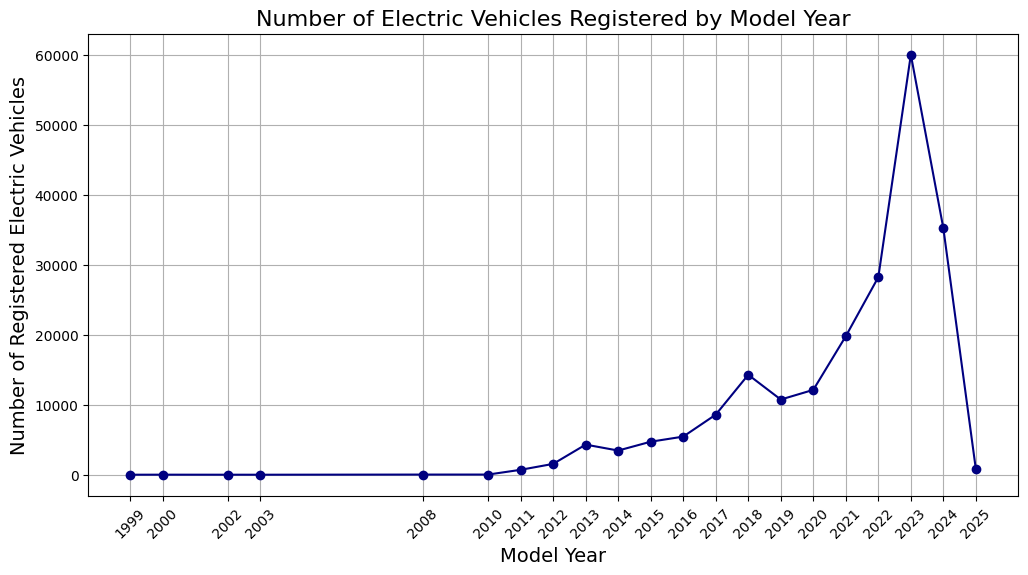

In [ ]:

ev_counts_per_model_year = df_visulization['Model Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(ev_counts_per_model_year.index, ev_counts_per_model_year.values, marker='o', color='navy', linestyle='-')


plt.title('Number of Electric Vehicles Registered by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=14)
plt.ylabel('Number of Registered Electric Vehicles', fontsize=14)
plt.xticks(ev_counts_per_model_year.index, rotation=45)
plt.grid(True)


plt.show()